In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 04: Monday, AST 5011: Astrophysical Systems

## Heat Transfer by Convection

### Michael Coughlin <cough052@umn.edu>

With contributions totally ripped off from Carl Fields (UA), Mike Zingale (SUNY), Cole Miller (UMD), and Abi Nolan (Purdue).


## Criteria for stability against convection

Similar to heat transport via radiation, convection requires the presence of a temperature gradient. However, there is a limit to how steep the temperature gradient can be while still allowing energy to be transported stably. If this limit is exceeded, an instability sets in, leading to cyclic macroscopic motions of the gas, known as convection.

### Schematic Diagram of Convection

![stellar convection in the O-shell burning region](figures/blobs.jpg)

Credit: Onno Pols – Stellar Structure and Evolution  
Schematic illustration of the Schwarzschild criterion for stability against convection.

1. A gas element is perturbed and displaced upward from position 1 to position 2.

2. The blob expands adiabatically, with no heat exchange,
   $$
   \mathrm{d}q = 0,
   $$
   in order to maintain pressure equilibrium with its surroundings:
   $$
   P_2 = P_{\rm equilibrium}.
   $$

If
$$
\rho_2 > \rho_{\rm equilibrium},
$$
the blob is denser than its surroundings and will sink back down to position 1.

If
$$
\rho_2 < \rho_{\rm equilibrium},
$$
buoyancy forces accelerate the blob upward and convection occurs.

This expansion of the blob over a distance $\Delta r$ takes place on the local dynamical timescale, i.e. approximately the sound-crossing time.

### Schwarzschild Criterion

The simplest criterion for stability against convection is known as the Schwarzschild criterion:
$$
\nabla < \nabla_{\rm ad}.
$$

A region is stable against convection if the actual temperature gradient,
$$
\nabla_{\rm actual} \equiv \frac{\mathrm{d}\ln T}{\mathrm{d}\ln P},
$$
is smaller than the adiabatic temperature gradient.

If all of the energy is transported by radiation, the actual gradient may be replaced by the radiative gradient, giving
$$
\nabla_{\rm rad} < \nabla_{\rm ad}.
$$

Violation of this condition implies that radiative transport alone cannot carry the required luminosity, and convection sets in.

The Schwarzschild criterion assumes a chemically homogeneous medium with no gradients in composition.

### Ledoux Criterion

If the mean molecular weight $\mu$ varies with depth, composition gradients affect buoyancy and must be included. Defining
$$
\nabla_\mu \equiv \frac{\mathrm{d}\ln \mu}{\mathrm{d}\ln P},
$$
the Ledoux criterion for stability against convection is
$$
\nabla < \nabla_{\rm ad} - \frac{\chi_\mu}{\chi_T}\nabla_\mu,
$$
where
$$
\chi_\mu \equiv \left( \frac{\partial \ln P}{\partial \ln \mu} \right)_{\rho,T},
\qquad
\chi_T \equiv \left( \frac{\partial \ln P}{\partial \ln T} \right)_{\rho,\mu}.
$$

Because the mean molecular weight generally increases inward, $\nabla_\mu \ge 0$, composition gradients typically act to stabilize the stratification. As a result, regions unstable according to the Schwarzschild criterion may be stable according to the Ledoux criterion.

### Conditions Favoring Convection

Convection is most likely to occur under one or more of the following conditions:

1. Large opacity $\kappa$. High opacity makes radiative transport inefficient, requiring a steeper temperature gradient.

2. Large energy flux. Regions with high nuclear energy generation rates, such as stellar cores in massive stars, are expected to develop convective cores.

3. Small adiabatic temperature gradient $\nabla_{\rm ad}$. Partial ionization zones lower $\nabla_{\rm ad}$, leading to shallow surface convection zones in stars of all masses where hydrogen and helium are partially ionized.


## In-class exercise: Radiative vs convective gradients

Goal: Compute the radiative temperature gradient and identify regions in a star where convection sets in using the Schwarzschild criterion.

Exercise tasks:

1. Compute the radiative gradient using the formula:

   $$\nabla_{\rm rad} = \frac{3}{16 \pi a c G} \frac{P \kappa}{T^4} \frac{L(r)}{M(r)}$$

   - $L(r)$ is the cumulative luminosity profile
   - $M(r)$ is the cumulative mass profile
   - $a$ = radiation constant, $c$ = speed of light, $G$ = gravitational constant
   - Fill in the missing terms in the code to calculate $\nabla_{\rm rad}$ at each radius.

2. Define the adiabatic gradient for a fully ionized ideal gas:

   $$\nabla_{\rm ad} = 1 - \frac{1}{\gamma}$$

   - $\gamma = 5/3$
   - Compare $\nabla_{\rm rad}$ and $\nabla_{\rm ad}$ to determine convective regions.

3. Apply the Schwarzschild criterion:

   Convection occurs where
   $$\nabla_{\rm rad} > \nabla_{\rm ad}$$

   - Identify zones in your profiles where this condition is satisfied.

4. Optional extension: Include a molecular weight gradient $\mu(r)$ and apply the Ledoux criterion:

   $$\nabla_{\rm Ledoux} = \nabla_{\rm ad} - \frac{\chi_\mu}{\chi_T} \nabla_\mu$$

   - Compute $\nabla_\mu = \frac{d \log \mu}{d \log P}$
   - Compare $\nabla_{\rm rad}$ to $\nabla_{\rm Ledoux}$ to see how composition gradients stabilize the star.

Hints:
- Use `np.gradient` and `np.log` to compute derivatives.
- Adjust $L(r)$ and $\kappa$ to see how changes in luminosity and opacity affect convection.
- To include Ledoux, define a molecular weight profile `mu(r)` and compute:

    ```python
    nabla_mu = np.gradient(np.log(mu), np.log(P))
    nabla_ledoux_limit = nabla_ad - (chi_mu/chi_T) * nabla_mu
    conv_ledoux = nabla_rad > nabla_ledoux_limit
    ```


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Toy stellar profile
r = np.linspace(1e8, 1e11, 1000)  # cm
M_star = 2e33  # g (1 Msun)
L_star = 3.8e33  # erg/s (solar luminosity)

rho = 100 * (1 - r/1e11)**3
P = 1e17 * (1 - r/1e11)**4
T = 1.5e7 * (1 - r/1e11)**0.3

kappa = 0.2 * (1 + 0.7) * np.ones_like(r)

# Constants
ac = 7.566e-15
G = 6.674e-8
pi = np.pi

# Mass and luminosity profiles
M_r = M_star * (r/r[-1])**3
L_r = L_star * (r/r[-1])**2

# TODO: fill in radiative gradient formula
# nabla_rad = ...

# dlnL_dlnM = np.gradient(...
# nabla_rad_numerical = (3/(16*pi*ac*G)) * (P * kappa / T**4) * dlnL_dlnM

# Adiabatic gradient
gamma = 5/3
# TODO: fill in adiabatic gradient formula
# nabla_ad = ...

# TODO: fill in Schwarzschild criterion
# conv_zones = ...

# Print results
print(f"Total zones: {len(r)}")
print(f"Zones where convection is triggered: {np.sum(conv_zones)}")

# Plot
plt.figure(figsize=(8,5))
plt.plot(r/1e10, nabla_rad, label=r'$\nabla_{\rm rad}$')
plt.plot(r/1e10, np.full_like(r, nabla_ad), '--', label=r'$\nabla_{\rm ad}$')
plt.fill_between(r/1e10, 0, 1, where=conv_zones, color='orange', alpha=0.3, label='Convective zone')
plt.xlabel('Radius (10^10 cm)')
plt.ylabel('Temperature gradient')
plt.title('Radiative vs Adiabatic Gradient')
plt.legend()
plt.show()

<details>
<summary><strong>Solution</strong></summary>

```python
# Radiative gradient
nabla_rad = (3/(16*pi*ac*G)) * (P * kappa / T**4) * (L_r / M_r)
dlnL_dlnM = np.gradient(np.log(L_r), np.log(M_r))

# Adiabatic gradient
nabla_ad = 1 - 1/gamma

# Convective zones (Schwarzschild criterion)
conv_zones = nabla_rad > nabla_ad
```
</details>

# The Mixing Length Theory

Stellar fluid can be thought of as being composed of parcels, eddies, elements, bubbles, or blobs that can move from regions of higher heat content to regions of lower heat content. These blobs are capable of transporting energy via convection. 

Mixing Length Theory (MLT) is a local theory of convection: it assumes that convective properties are determined primarily by conditions in the immediate vicinity of a blob, not by global stellar structure.

## Assumptions in MLT

1. A parcel has a characteristic size comparable to the mixing length $\ell$.
2. The mixing length is shorter than any scale length associated with the stellar structure, e.g., the pressure scale height $H_{\rm P}$: in practice, $\ell \sim H_{\rm P}$.
3. The parcel maintains pressure equilibrium with its surroundings at all times.
4. Acoustic phenomena, shocks, and other dynamical effects are ignored.
5. Temperature and density differences between a parcel and its surroundings are small (linear approximation).

## Convective Properties in MLT

Within the MLT framework, we can compute several key properties.

### Convective velocity

The typical convective velocity is

$$
v_{\rm conv} \approx \sqrt{\frac{1}{2} \ell g \frac{\Delta T}{T}} \approx \sqrt{\frac{\ell^2 g}{2 H_{\rm P}} (\nabla - \nabla_{\rm ad})}
$$

where 

- $\Delta T / T$ measures the superadiabatic temperature excess, $\nabla - \nabla_{\rm ad}$,  
- $g$ is the local gravity, and  
- $H_{\rm P}$ is the pressure scale height.

### Convective energy flux

The convective flux is approximately (HKT Eq. 5.38):

$$
F_{\rm conv} = \rho c_{\rm P} T \left(\frac{\ell}{H_{\rm P}}\right)^2 \sqrt{\frac{g H}{2}} (\nabla - \nabla_{\rm ad})^{3/2}
$$

where $c_{\rm P}$ is the specific heat at constant pressure, and the factor $(\nabla - \nabla_{\rm ad})^{3/2}$ captures the efficiency of convective transport.

### Convective mixing

Convection is an efficient mixing mechanism. For the Sun, typical velocities are:

$$
v_{\rm conv} \sim 5 \times 10^3 \, \mathrm{cm\,s^{-1}}
$$

leading to mixing timescales of:

$$
\tau_{\rm mix} \sim \frac{d}{v_{\rm conv}} \sim \text{weeks to months} \ll \tau_{\rm KH} \ll \tau_{\rm nuc}
$$

Consequences for stellar structure:

1. Nuclear burning in a convective core leads to homogenization of the core.
2. A deep convective envelope can dredge up processed material from nuclear-burning regions toward the surface (dredge-up).

### Convective overshoot

A convective blob may overshoot the classical boundary of a convective zone due to its non-zero velocity. In stellar evolution models, this is often parameterized as:

$$
d_{\rm ov} = \alpha_{\rm ov} H_{\rm P}
$$

where $\alpha_{\rm ov}$ is a fractional parameter and $H_{\rm P}$ the local pressure scale height.

### Brunt–Väisälä frequency

Another method for assessing convective stability is the Brunt–Väisälä frequency:

$$
N^2 = g \left[ \frac{1}{\Gamma_1 P} \frac{dP}{dr} - \frac{1}{\rho} \frac{d\rho}{dr} \right] \equiv - \frac{\chi_T}{\chi_\rho} (\nabla - \nabla_{\rm ad}) \frac{g}{H_{\rm P}}
$$

- $N^2 < 0$ indicates an unstable (convective) region.  
- $\Gamma_1$ is the adiabatic index, and $\chi_T$, $\chi_\rho$ are the usual partial derivatives of $\ln P$ with respect to $\ln T$ and $\ln \rho$.  

This provides a local linear stability criterion for convection, complementary to the Schwarzschild criterion.

### Additional clarifications / notes

- MLT is phenomenological: $\ell/H_{\rm P}$ is a free parameter in most stellar evolution codes.  
- Superadiabaticity is typically very small in the Sun’s deep interior, so convection is extremely efficient.  
- Convective overshoot is particularly important near stellar cores and interior mixing in massive stars.  
- Brunt–Väisälä frequency also connects to stellar oscillations and can be measured in asteroseismology.  


## In-Class Exercise: Mixing Length Theory

In this exercise, we will compute the convective velocity and convective flux using Mixing Length Theory for a simple stellar layer. You will use the superadiabatic temperature gradient, $\nabla - \nabla_{\rm ad}$, the pressure scale height $H_{\rm P}$, and local gravity $g$.

### Exercise Tasks

1. Compute the convective velocity:

$$
v_{\rm conv} \approx \sqrt{\frac{\ell^2 g}{2 H_{\rm P}} (\nabla - \nabla_{\rm ad})}
$$

2. Compute the convective flux:

$$
F_{\rm conv} = \rho c_{\rm P} T \left(\frac{\ell}{H_{\rm P}}\right)^2 \sqrt{\frac{g H_{\rm P}}{2}} (\nabla - \nabla_{\rm ad})^{3/2}
$$

Use the following parameters for a solar-like layer:

- $\ell / H_{\rm P} = 1.0$ (mixing length equals pressure scale height)  
- $H_{\rm P} = 5 \times 10^9 \, \rm{cm}$  
- $g = 2.74 \times 10^4 \, \rm{cm/s^2}$  
- $\rho = 0.2 \, \rm{g/cm^3}$  
- $T = 2 \times 10^6 \, \rm{K}$  
- $c_{\rm P} = 2 \times 10^8 \, \rm{erg/g/K}$  
- $\nabla - \nabla_{\rm ad} = 0.001$  

In [ ]:
import numpy as np

# Given parameters
H_P = 5e9           # cm
g = 2.74e4          # cm/s^2
rho = 0.2           # g/cm^3
T = 2e6             # K
c_P = 2e8           # erg/g/K
nabla_super = 0.001 # superadiabatic gradient
ell_over_HP = 1.0   # mixing length / pressure scale height

# Task 1: compute the convective velocity v_conv
ell = ell_over_HP * H_P

v_conv = ... # FILL ME

print(f"Convective velocity: {v_conv:.2e} cm/s")

# Task 2: compute the convective flux F_conv
F_conv = ### FILL ME

print(f"Convective flux: {F_conv:.2e} erg/cm^2/s")

<details>
<summary><strong>Solution</strong></summary>

```python
v_conv = np.sqrt((ell**2 * g / (2 * H_P)) * nabla_super)
F_conv = rho * c_P * T * (ell / H_P)**2 * np.sqrt(g * H_P / 2) * nabla_super**(3/2)

```
</details>

## In-Class Exercise: Convective Profiles in a Stellar Envelope

In this exercise, we will compute the convective velocity and convective flux across multiple layers of a star. We will see how $v_{\rm conv}$ and $F_{\rm conv}$ vary with depth and superadiabaticity.

The equations are:

$$
v_{\rm conv} = \sqrt{\frac{\ell^2 g}{2 H_{\rm P}} (\nabla - \nabla_{\rm ad})}
$$

$$
F_{\rm conv} = \rho c_{\rm P} T \left(\frac{\ell}{H_{\rm P}}\right)^2 \sqrt{\frac{g H_{\rm P}}{2}} (\nabla - \nabla_{\rm ad})^{3/2}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple stellar envelope profile
n_layers = 10
H_P = 5e9                     # cm
g = 2.74e4                     # cm/s^2
rho = np.linspace(0.5, 0.1, n_layers)    # g/cm^3, decreasing outward
T = np.linspace(2e6, 1e6, n_layers)     # K, decreasing outward
c_P = 2e8                       # erg/g/K
nabla_super = np.linspace(0.001, 0.0001, n_layers)  # superadiabatic gradient
ell_over_HP = 1.0

ell = ell_over_HP * H_P

# Arrays to store results
v_conv = np.zeros(n_layers)
F_conv = np.zeros(n_layers)

for i in range(n_layers):
    # Compute convective velocity (fill in)
    v_conv[i] = ### FILL ME
    
    # Compute convective flux (fill in)
    F_conv[i] = ### FILL ME

# Plot results
plt.figure(figsize=(8,5))
plt.plot(v_conv, np.arange(n_layers), 'o-', label='v_conv (cm/s)')
plt.plot(F_conv/1e9, np.arange(n_layers), 's-', label='F_conv (10^9 erg/cm^2/s)')
plt.gca().invert_yaxis()
plt.xlabel('Value')
plt.ylabel('Layer index (outward)')
plt.title('Convective velocity and flux across stellar layers')
plt.legend()
plt.show()

<details>
<summary><strong>Solution</strong></summary>

```python
v_conv[i] = np.sqrt((ell**2 * g / (2 * H_P)) * nabla_super[i])
F_conv[i] = rho[i] * c_P * T[i] * (ell/H_P)**2 * np.sqrt(g*H_P/2) * nabla_super[i]**(3/2)
```
</details>

# Hydrodynamic Calculations

Computational modeling of stellar hydrodynamics has advanced our understanding of stellar structure and evolution. Multi-dimensional stellar simulations can help constrain free parameters in mixing length theory (MLT) and other mixing processes, such as convective overshoot, calibration of the mixing length parameter, convective velocity speeds, and 3D velocity distributions.

Here is an example of stellar convection in the O-shell burning region of a $20 M_{\odot}$ star near iron core-collapse from [C. E. Fields and Sean M. Couch 2021, ApJ 921 28](https://iopscience.iop.org/article/10.3847/1538-4357/ac24fb#apjac24fbf19). They find that convective velocities are on average 2-3 times larger than those predicted by MLT.

[![stellar convection in the O-shell burning region](figures/apjac24fbf19_hr.jpg)](https://youtube.com/shorts/ICwpSSDsxK8?si=LYdOeP80gzKZy6uV)

## Giant Planet Structure

The interiors of Jupiter and Saturn are modeled assuming a distinct heavy-element core surrounded by an envelope divided into an inner helium- and heavy-element-rich layer and an outer envelope which is helium-poor and less enriched with heavy elements. For a detailed review, see [Fortney and Nettelmann 2010](https://arxiv.org/pdf/0912.0533).

Helium rain, the condensation of helium into droplets which releases latent heat, has been proposed to explain Saturn's high thermal emission. The exact location and conditions where helium rain occurs are still uncertain and strongly affect interior models.

**Phase Diagram of H/He mixture:**

![phase_diagram](figures/phase_diagram.jpg)

Credit: Guillot and Gautier (2014)  
The orange region shows the region of H-He separation derived by Lorenzen et al. (2011). The red curve shows the critical temperature for that separation according to Morales et al. (2013). Numerical and experimental results by Schouten et al. (1991) and Loubeyre et al. (1991) are also shown. The black curves indicate the isentropes of Jupiter (solid) and Saturn (dashed), respectively.

Models suggest a core of less than about $10 M_{\oplus}$ for Jupiter and a core mass of up to $20 M_{\oplus}$ for Saturn.

**Schematic Diagram of Jupiter and Saturn Interiors:**

![giant planets interior](figures/giant_planets_interior.jpg)

Credit: Interior views of Jupiter and Saturn, from calculations with the Saumon et al. (1995) “chemical picture” H/He equation of state.

### Closer Look at the Cores

Recent estimates of Jupiter’s gravitational field from the Juno spacecraft (Bolton et al. 2017) suggest that Jupiter may have a diluted core. In this scenario, the core is not a compact heavy-element region with a sharp density discontinuity but a more extended region that can include lighter elements. 

### Composition Gradients

Composition gradients can inhibit convection and affect heat transport in giant planets.

- **Layered convection**: convective mixing occurs in regions that are stable according to the Ledoux criterion but unstable according to the Schwarzschild criterion.

- **Thermohaline (fingering) convection**: vertical transport of chemical elements in radiative zones where the mean molecular weight decreases with radius. The entropy is stably stratified ($\nabla - \nabla_{\rm ad} < 0$, non-convective) but the composition gradient is unstably stratified ($\nabla_{\mu} < 0$).

![thermohaline](figures/thermohaline.jpg)

Credit: Peter Z. Harrington and Pascale Garaud 2019, ApJL 870 L5  
Visualizations of vertical fluid velocity in thermohaline simulations. Increasing the vertical magnetic field enhances the coherence of fingering structures.

- **Semi-convection**: oscillatory double-diffusive convection occurs when entropy is unstably stratified but chemical composition is stably stratified.

![giant planets](figures/giant_planets.jpg)

Sketches of the internal structures of Jupiter, Saturn, Uranus, and Neptune as inferred from structure models. For each planet, two possible structures are shown: one with distinct layers and one with a gradual distribution of heavy elements.


## In-Class Exercise: Convection Stability

This exercise explores Schwarzschild vs Ledoux stability. You will compute the stability of a stellar layer using both criteria and identify regions where layered convection may occur.

In [ ]:
import numpy as np

# Example stellar layer data
r = np.linspace(0.7, 1.0, 100)          # normalized radius
P = 1e17 * (1 - r)**4                     # pressure profile
T = 2e7 * (1 - r)**0.3                    # temperature profile
mu = 0.6 + 0.1*(1-r)**2                   # mean molecular weight profile

# Adiabatic gradient
nabla_ad = 0.4

# Compute derivatives (logarithmic)
dlnT_dlnP = np.gradient(np.log(T), np.log(P))
dlnmu_dlnP = np.gradient(np.log(mu), np.log(P))

# Thermodynamic derivatives (ideal gas approximation)
chi_T = 1.0
chi_mu = 1.0

# Schwarzschild stability
stable_schwarzschild = dlnT_dlnP < ... # FILL ME

# Ledoux stability
stable_ledoux = dlnT_dlnP < ... # FILL ME

# Layered convection (Schwarzschild unstable but Ledoux stable)
layered = .... # FILL ME

# Print summary
print("Stable regions (Schwarzschild):", np.sum(stable_schwarzschild))
print("Stable regions (Ledoux):", np.sum(stable_ledoux))
print("Layered convection regions:", np.sum(layered))

# Plot results
plt.figure(figsize=(8,5))
plt.plot(r, dlnT_dlnP, label=r'$\nabla_{\rm actual}$')
plt.axhline(nabla_ad, color='red', linestyle='--', label=r'$\nabla_{\rm ad}$')
plt.fill_between(r, 0, 1.0, where=stable_schwarzschild, color='green', alpha=0.3, label='Schwarzschild Stable')
plt.fill_between(r, 0, 1.0, where=stable_ledoux, color='blue', alpha=0.3, label='Ledoux Stable')
plt.fill_between(r, 0, 1.0, where=layered, color='orange', alpha=0.5, label='Layered Convection')
plt.xlabel('Normalized radius r')
plt.ylabel(r'$\nabla$')
plt.title('Schwarzschild vs Ledoux Stability')
plt.legend()
plt.show()

<details>
<summary><strong>Solution</strong></summary>

```python
# Schwarzschild stability
stable_schwarzschild = dlnT_dlnP < nabla_ad

# Ledoux stability
stable_ledoux = dlnT_dlnP < nabla_ad - (chi_mu/chi_T)*dlnmu_dlnP

# Layered convection (Schwarzschild unstable but Ledoux stable)
layered = (~stable_schwarzschild) & stable_ledoux
```
</details>

# In-Class Assignment: Exploring Heat Transfer via Convection with MESA

### Learning Objectives

- identify convective and radiative regions using MESA models and analytical expressions
- explain convective behavior in advanced burning massive stars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Download the following model files locally. These data were produced using the `20M_pre_ms_to_core_collapse` test suite. 

* $15 M_{\odot}$: [15m_ms_profile.data](data/week5/15m_ms_profile.data); [15m_core_O_burning_profile.data](data/week5/15m_core_O_burning_profile.data);

In [21]:
# load data and see which variables are available
ms = pd.read_csv('data/15m_ms_profile.data',sep=r'\s+',header=4)
ms.columns

Index(['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H',
       'y_mass_fraction_He', 'z_mass_fraction_metals', 'q', 'log_q', 'radius',
       'radius_cm', 'logxq', 'temperature', 'logT_face', 'logT_bb', 'energy',
       'density', 'pressure', 'prad', 'pgas', 'eta', 'mu', 'grada', 'cv', 'cp',
       'gamma1', 'gamma3', 'chiRho', 'chiT', 'eps_nuc', 'pp', 'cno',
       'tri_alpha', 'other', 'ye', 'z', 'opacity', 'luminosity', 'log_Lrad',
       'log_Ledd', 'lum_conv', 'mlt_mixing_length', 'conv_vel', 'gradT',
       'gradr', 'grad_temperature', 'grad_density', 'log_Lconv', 'tau',
       'log_irradiation_heat', 'zbar_div_abar'],
      dtype='object')

In [19]:
# example reading a variable from the profile data
ms_gradT = ms['gradT']
ms_gradT

0      0.226126
1      0.226785
2      0.228687
3      0.230530
4      0.233406
         ...   
382    0.289689
383    0.289688
384    0.289687
385    0.289687
386    0.289687
Name: gradT, Length: 387, dtype: float64

## Convection in Massive Stars

Using the 15 $M_\odot$ model MESA profile: 

### a. 

Using the `15m_ms_profile.data` profile.

1. Compute the adiabatic temperature gradient using HKT 3.99 for $\nabla_{\rm{ad}}$ and the profile plot data. 

2. Plot the computed $\nabla_{\rm{ad}}$ and $\nabla_{\rm{actual}}$ from the MESA profile `gradT` as a function of mass.  

Where is the model convective? 

Compare with Pols Fig. 5.4.

![Pols Fig 5.4](figures/pols_fig5p4.png)

<>:28: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_27442/3551191696.py:28: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Temperature gradients in 15 $M_\odot$ Main-Sequence Star')


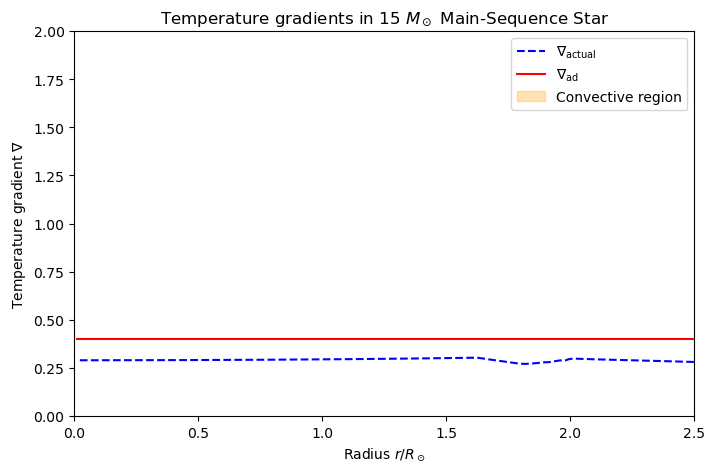

In [20]:
## a results here

# Extract columns
r = ms['radius'].values
P = ms['pressure'].values
# T = ms['temperature'].values
gradT = ms['gradT'].values

# Adiabatic gradient (assume ideal gas, fully ionized)
Gamma2 = 5/3
nabla_ad = (Gamma2 - 1)/Gamma2

# Actual gradient
nabla_actual = gradT

# Identify convective regions
convective = nabla_actual > nabla_ad

# Plot
plt.figure(figsize=(8,5))
plt.plot(r, gradT, 'b--', label=r'$\nabla_{\rm actual}$')
plt.plot(r, np.full_like(r, nabla_ad), 'r-', label=r'$\nabla_{\rm ad}$')
plt.fill_between(r, 0, 2, where=convective, color='orange', alpha=0.3, label='Convective region')
plt.xlabel(r'Radius $r / R_\odot$')
plt.ylabel(r'Temperature gradient $\nabla$')
plt.xlim(0, 2.5)
plt.ylim(0, 2)
plt.title('Temperature gradients in 15 $M_\odot$ Main-Sequence Star')
plt.legend()
plt.show()

### b. 

Add the radiative gradient $\nabla_{\rm{rad}}$ (`gradr`) and the $\nabla_{\rm{ad}}$ (`grada`) computed by MESA on the same plot.

Do they agree with your computed $\nabla_{\rm{ad}}$?

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_27442/3977123336.py:16: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Temperature gradients in 15 $M_\odot$ Main-Sequence Star')


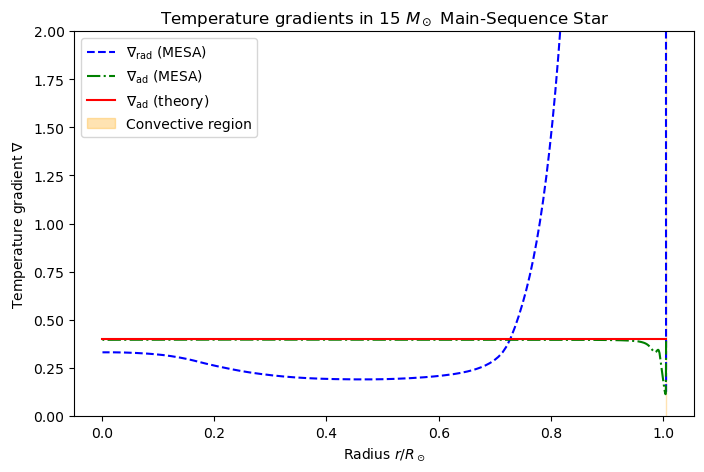

In [17]:
## b results here

gradr = ms['gradr'].values
grada_mesa = ms['grada'].values

grada_calc = (Gamma2 - 1)/Gamma2

plt.figure(figsize=(8,5))
plt.plot(r, gradr, 'b--', label=r'$\nabla_{\rm rad}$ (MESA)')
plt.plot(r, grada_mesa, 'g-.', label=r'$\nabla_{\rm ad}$ (MESA)')
plt.plot(r, np.full_like(r, grada_calc), 'r-', label=r'$\nabla_{\rm ad}$ (theory)')
plt.fill_between(r, 0, 2, where=convective, color='orange', alpha=0.3, label='Convective region')
plt.xlabel(r'Radius $r / R_\odot$')
plt.ylabel(r'Temperature gradient $\nabla$')
plt.ylim(0, 2)
plt.title('Temperature gradients in 15 $M_\odot$ Main-Sequence Star')
plt.legend()
plt.show()

### c. 

Using the `15m_core_O_burning_profile.data` profile.

Plot $\nabla_{\rm{ad}}$, $\nabla_{\rm{actual}}$, and $\nabla_{\rm{rad}}$ from the MESA profile. 


Where is the model convective? 

<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:36: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_27442/1929197494.py:36: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Temperature gradients in 15 $M_\odot$ Main-Sequence Star')


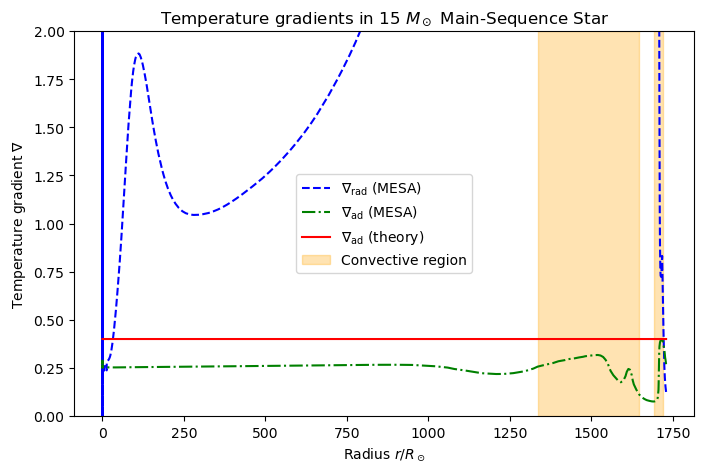

In [ ]:
## c results here

# load data and see which variables are available
ms = pd.read_csv('data/15m_core_O_burning_profile.data',sep=r'\s+',header=4)
ms.columns

# Extract columns
r = ms['radius'].values
P = ms['pressure'].values
# T = ms['temperature'].values
gradT = ms['gradT'].values

# Adiabatic gradient (assume ideal gas, fully ionized)
Gamma2 = 5/3
nabla_ad = (Gamma2 - 1)/Gamma2

# Actual gradient
nabla_actual = gradT

# Identify convective regions
convective = nabla_actual > nabla_ad

gradr = ms['gradr'].values
grada_mesa = ms['grada'].values

grada_calc = (Gamma2 - 1)/Gamma2

plt.figure(figsize=(8,5))
plt.plot(r, gradr, 'b--', label=r'$\nabla_{\rm rad}$ (MESA)')
plt.plot(r, grada_mesa, 'g-.', label=r'$\nabla_{\rm ad}$ (MESA)')
plt.plot(r, np.full_like(r, grada_calc), 'r-', label=r'$\nabla_{\rm ad}$ (theory)')
plt.fill_between(r, 0, 2, where=convective, color='orange', alpha=0.3, label='Convective region')
plt.xlabel(r'Radius $r / R_\odot$')
plt.ylabel(r'Temperature gradient $\nabla$')
plt.ylim(0, 2)
plt.title('Temperature gradients in 15 $M_\odot$ Core Oxygen Burning Star')
plt.legend()
plt.show()

### d. 

Using the `15m_core_O_burning_profile.data` profile.

Plot `mu` from the MESA profile. 

Comment briefly on the behavior of `mu` inside and outside of convective regions. 

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_27442/482953714.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Composition Profile in 15 $M_\odot$ Star (O-shell burning)')


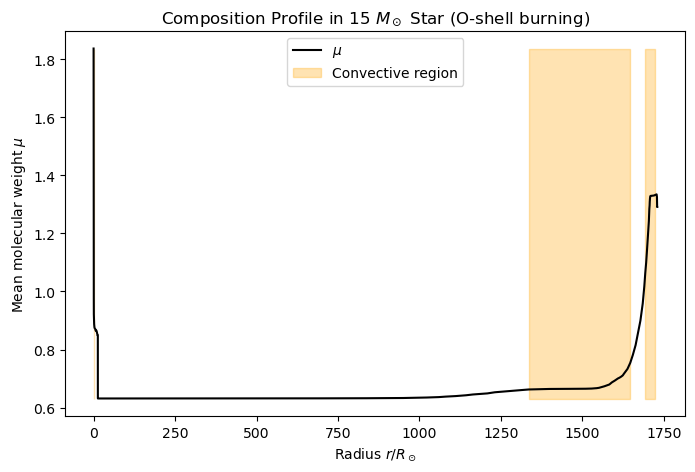

In [26]:
## d results here

mu = ms['mu'].values

# Plot mu
plt.figure(figsize=(8,5))
plt.plot(r, mu, 'k-', label=r'$\mu$')
plt.fill_between(r, mu.min(), mu.max(), where=convective, color='orange', alpha=0.3, label='Convective region')
plt.xlabel(r'Radius $r / R_\odot$')
plt.ylabel(r'Mean molecular weight $\mu$')
plt.title('Composition Profile in 15 $M_\odot$ Star (O-shell burning)')
plt.legend()
plt.show()
